<a href="https://colab.research.google.com/github/yongzhiqu/IE_4495/blob/master/CH04_SEC03_1_OverUnderDetermined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 18})

In [ ]:
# Underdetermined
n = 20
m = 100
# Ax=b, (A_i, b_i), num of pairs = number of samples, dimension of A_i is the dimension and determine the number of parameters
A = np.random.rand(n,m) # n by m
b = np.random.rand(n) # n by 1, in matlab this will be n by n

def one_norm(x):
    return np.linalg.norm(x,ord=1)

x0 = np.random.rand(m)
constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b}) # function minimize() has a parameter that takes a constraint, and contraint can be defined as equallity or inequality
# in this call, it is specified type is 'eq', means the result of the contraint function equals to zero. when ‘ineq’ is used it means the result is >=0
# for details refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

res = minimize(one_norm, x0, method='SLSQP', constraints=constr) #  constraints=constr means A @ x - b = 0, 
# futher means a@x = b, abs(A @ x - b)=0, equvivalent to minimize abs(A @ x - b)
x1 = res.x

def two_norm(xx):
    return np.linalg.norm(xx,ord=2)

# minimize  A @ x - b + l-1 constraint
# or minimize l-1 norm with  A @ x - b as constraint

res = minimize(two_norm, x0, method='SLSQP', constraints=constr)
x2 = res.x



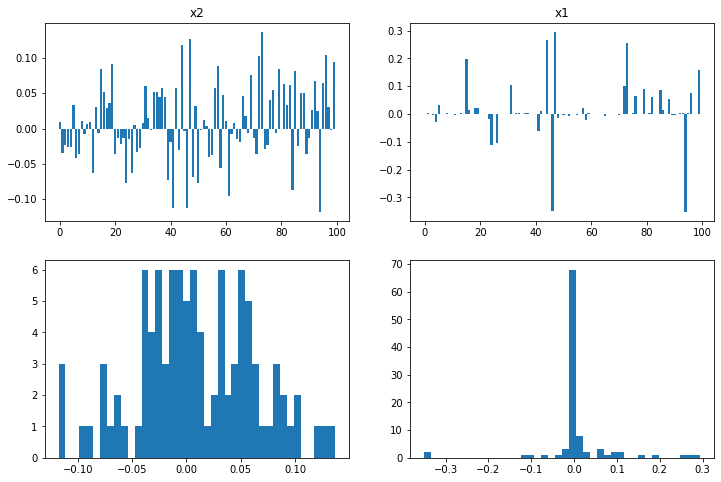

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

axs[2].hist(x2,40)
axs[3].hist(x1,40)

# b = Ax, x = [x1,x2,x3,x4,x5.....]
# b = a1 * x1 + a2 * x2+ a3 * x3+ ...
# muted a lot of valriables by seting the coefficient to 0
# housing 13, 4 non-zero paras


plt.show()

In [1]:
# Overdetermined
n = 500
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

xdag = np.linalg.pinv(A)@b

lam = np.array([0, 0.1, 0.5, 0.9])


# minimize (Ax-b)^2 or minimize abs(Ax-b)
# also want to minimize sum(abs(xx))
# 
def reg_norm(xx,AA,bb,lam_bda):
    return np.linalg.norm(1*AA@xx-bb,ord=2) + lam_bda*np.linalg.norm(xx,ord=1) 

fig,axs = plt.subplots(len(lam),2)
for j in range(len(lam)):
    res = minimize(reg_norm,x0=xdag,args=(A,b,lam[j]))
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)


NameError: ignored

(60, 20)
(1200,)


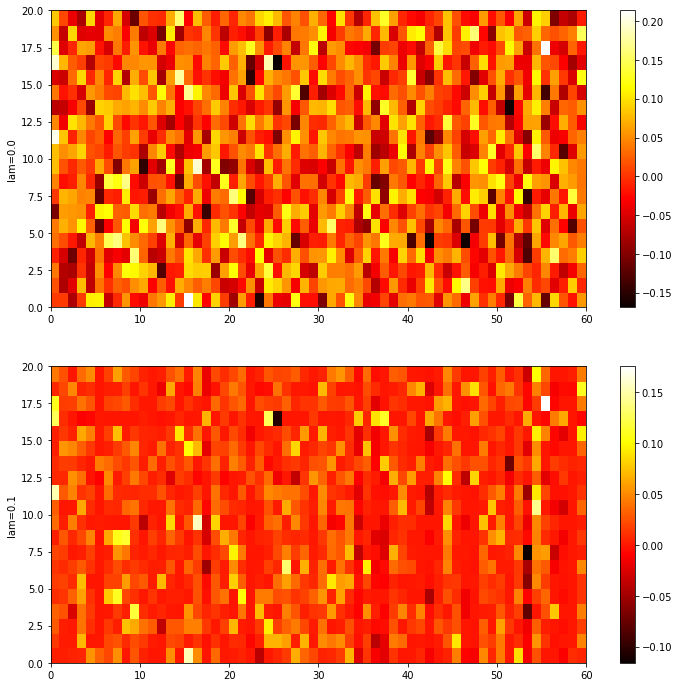

In [ ]:
## Matrix Overdetermined System
plt.rcParams['figure.figsize'] = [12, 12]

# overdetermined
n = 300
m = 60
p = 20
A = np.random.rand(n,m)
b = np.random.rand(n,p)
lam = np.array([0,0.1])

xdag = np.linalg.pinv(A)@b

print(xdag.shape)
xdag = xdag.reshape(-1)
print(xdag.shape)

def reg_norm_2d(x,A,b,lam,m,p):
    # scipy minimize() does not accept multidimensional x
    # To get around this, we pass x as a vector and reshape it
    x = np.reshape(x,(m,p))
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)


fig,axs = plt.subplots(len(lam),1)
for j in range(len(lam)):
    res = minimize(reg_norm_2d,args=(A,b,lam[j],m,p),x0=xdag)
    x = res.x
    x = x.reshape(m,p)
    x_pcolor = axs[j].pcolor(x.T,cmap='hot')
    fig.colorbar(x_pcolor, ax=axs[j])
    axs[j].set_ylabel('lam='+str(lam[j]))
    
plt.show()